In [41]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [54]:
data= pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
df= data.drop("Id",axis=1)

In [56]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [58]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [59]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


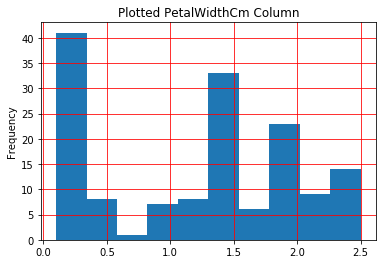

In [62]:
df['PetalWidthCm'].plot.hist()
plt.grid(color = 'red')
plt.title('Plotted PetalWidthCm Column')
plt.show()

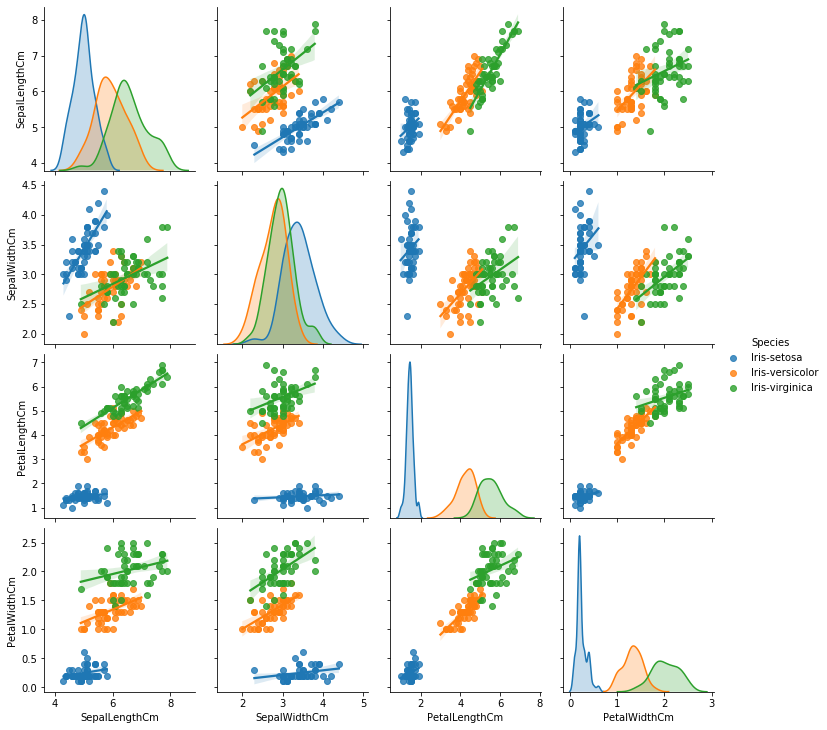

In [64]:
import seaborn as sns
sns.pairplot(df, kind = "reg", hue='Species')


In [65]:
#  Extracting Independent and Dependent Variable from the dataset

all_inputs = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
all_classes = df['Species'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, 
                                                                train_size=0.7, random_state=1)

In [71]:
from sklearn.metrics import accuracy_score, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
dtc.score(test_inputs, test_classes)

0.9555555555555556

In [74]:
# Predicting from Test data

predictions= dtc.predict(test_inputs)
print(classification_report(test_classes, predictions))
#score= accuracy_score(test_classes, predictions)   #predicts accuracy between 0 and 1
#score
print('\nAccuracy: {0:.4f}'.format(accuracy_score(test_classes, predictions)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45


Accuracy: 0.9556


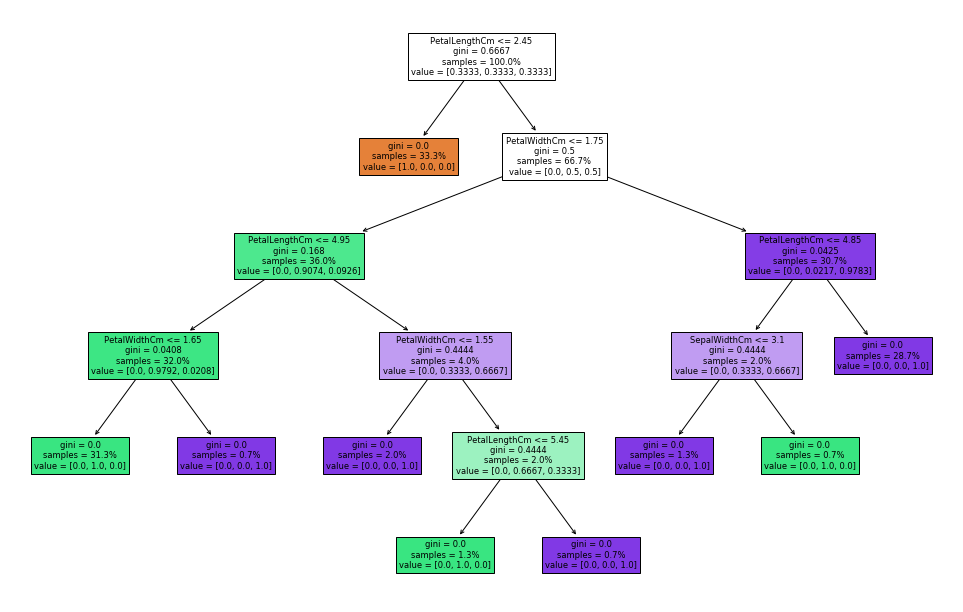

In [76]:
from sklearn import tree
plt.figure(figsize=(17,11))
tree.plot_tree(dtc.fit(all_inputs, all_classes),feature_names=list(df.columns),proportion=True,filled=True,precision=4)
plt.show()